## **Wine Quality Prediction Using Logistic Regression**

**Import Library**

In [1]:
import pandas as pd
import numpy as np

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

**Import Data**

In [2]:
wine = pd.read_csv(r'https://github.com/YBI-Foundation/Dataset/raw/main/WhiteWineQuality.csv',sep=';')

**Explore Data**

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wine.shape

(4898, 12)

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [7]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

**Identifying Missing Values**

In [8]:
wine.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,False,False,False,False,False,False,False,False,False,False,False,False
4894,False,False,False,False,False,False,False,False,False,False,False,False
4895,False,False,False,False,False,False,False,False,False,False,False,False
4896,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Identifying and Removing Duplicate Values**

In [10]:
wine.duplicated().sum()

np.int64(937)

In [11]:
wine.drop_duplicates(inplace=True)

In [12]:
wine.shape

(3961, 12)

**Data Preprocessing**

In [13]:
# Oulier Visulaization

In [14]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

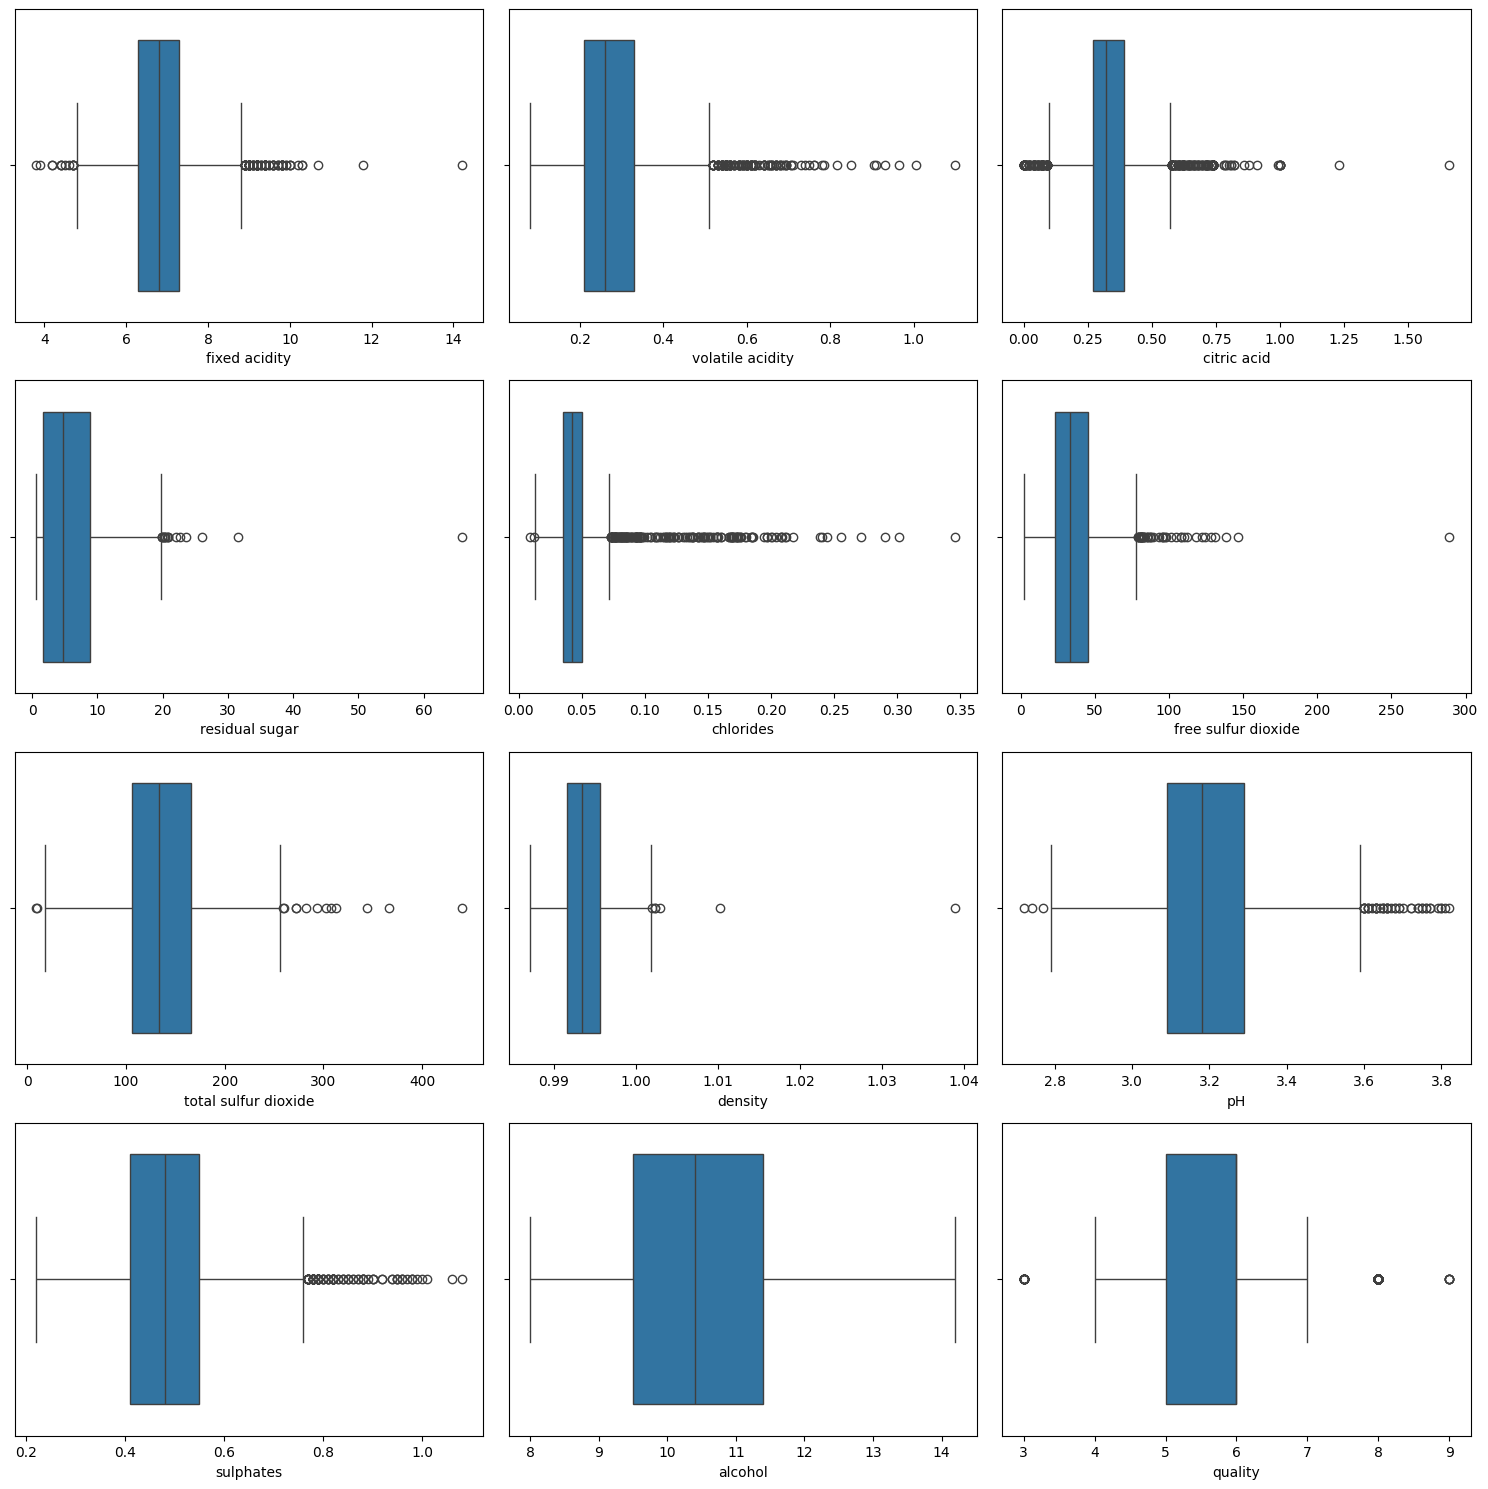

In [15]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
           'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol','quality']

fig, axes = plt.subplots(4, 3, figsize=(15, 15))

axes = axes.flatten()

for i, column in enumerate(columns):
    sns.boxplot(x=wine[column], ax=axes[i])


plt.tight_layout()
plt.show()

In [16]:
wine1 = wine.copy()

In [17]:
wine1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


**Calculating quantiles for each feature**

In [18]:
Q1 = wine1.quantile(0.25)
Q3 = wine1.quantile(0.75)
IQR = Q3 - Q1
IQR

fixed acidity            1.00000
volatile acidity         0.12000
citric acid              0.12000
residual sugar           7.30000
chlorides                0.01500
free sulfur dioxide     22.00000
total sulfur dioxide    60.00000
density                  0.00409
pH                       0.20000
sulphates                0.14000
alcohol                  1.90000
quality                  1.00000
dtype: float64

**Identifying and Removing Outlier**

In [19]:
outliers = wine1[((wine1 < (Q1 - 1.5 * IQR)) | (wine1 > (Q3 + 1.5 * IQR))).any(axis=1)]
outliers

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.80,6
14,8.3,0.42,0.62,19.25,0.040,41.0,172.0,1.00020,2.98,0.67,9.70,5
16,6.3,0.48,0.04,1.10,0.046,30.0,99.0,0.99280,3.24,0.36,9.60,6
17,6.2,0.66,0.48,1.20,0.029,29.0,75.0,0.98920,3.33,0.39,12.80,8
22,6.8,0.26,0.42,1.70,0.049,41.0,122.0,0.99300,3.47,0.48,10.50,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4867,5.3,0.60,0.34,1.40,0.031,3.0,60.0,0.98854,3.27,0.38,13.00,6
4877,5.9,0.54,0.00,0.80,0.032,12.0,82.0,0.99286,3.25,0.36,8.80,5
4878,6.2,0.53,0.02,0.90,0.035,6.0,81.0,0.99234,3.24,0.35,9.50,4
4886,6.2,0.21,0.28,5.70,0.028,45.0,121.0,0.99168,3.21,1.08,12.15,7


In [20]:
out = wine1[~((wine1 < (Q1 - 1.5 * IQR)) | (wine1 > (Q3 + 1.5 * IQR))).any(axis=1)]
wine = out.copy()
wine.shape

(3131, 12)

**Data Visualization**

In [21]:
wine['quality'].value_counts()

quality
6    1527
5     894
7     626
4      84
Name: count, dtype: int64

C:\Users\Anjana\AppData\Local\Temp\ipykernel_16360\3935893085.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=wine['quality'], palette="Set1")


<Axes: xlabel='quality', ylabel='count'>

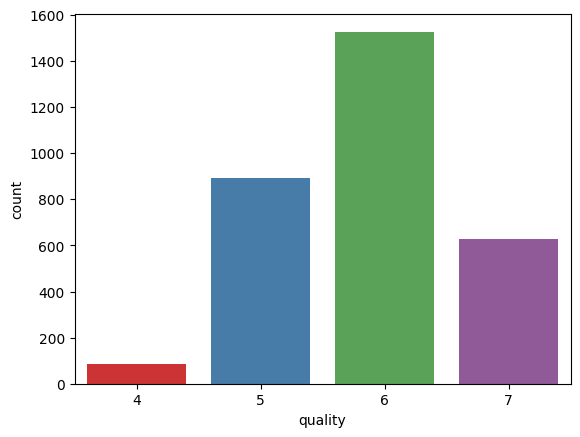

In [22]:
sns.countplot(x=wine['quality'], palette="Set1")

In [23]:
wine.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
4,7.042857,0.300060,0.317500,4.601786,0.044857,20.565476,117.285714,0.993797,3.168929,0.455833,10.342262
5,6.851622,0.283663,0.323188,6.956040,0.045979,35.439597,149.463087,0.994939,3.178770,0.480336,9.930943
6,6.787819,0.254430,0.325527,5.790111,0.041871,34.854617,135.451866,0.993552,3.195193,0.484682,10.685320
7,6.722764,0.262915,0.326997,4.577316,0.037161,33.116613,121.235623,0.992039,3.221693,0.486022,11.515362


In [24]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
           'sulphates', 'alcohol']

# Set up the plot
plt.figure(figsize=(100, 80))  # Adjusted figsize for readability
sns.set(font_scale=5)  # Adjust font scale as needed

# Create subplots for each column
for i, column in enumerate(columns, start=1):
    plt.subplot(4, 3, i)  # Adjust subplot dimensions as needed
    sns.barplot(x='quality', y=column, data=wine, palette="deep")
    plt.title(f"Quantity vs {column}")


plt.tight_layout()  # Adjust layout for better spacing
plt.show()

C:\Users\Anjana\AppData\Local\Temp\ipykernel_16360\1046781522.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y=column, data=wine, palette="deep")
C:\Users\Anjana\AppData\Local\Temp\ipykernel_16360\1046781522.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y=column, data=wine, palette="deep")
C:\Users\Anjana\AppData\Local\Temp\ipykernel_16360\1046781522.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y=column, data=wine, palette="deep")
C:\Users\Anjana\AppData\Local\Temp\ipykernel_16360\1

In [25]:
wine['quality'] = wine.quality.apply(lambda x:1 if x>=6 else 0)

In [26]:
count = wine['quality'].value_counts()
count

quality
1    2153
0     978
Name: count, dtype: int64

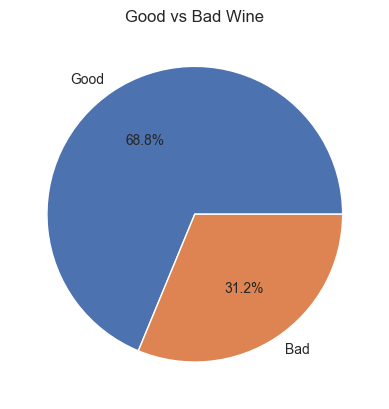

In [27]:
mylabels = ['Good', 'Bad']

plt.pie(count, labels=mylabels, autopct='%1.1f%%', textprops={'fontsize': 10})

plt.title('Good vs Bad Wine', fontsize=12)

plt.show()

**Correlation Visualization**

In [28]:
corr_matrix = wine.corr()
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.026401,0.255031,0.063909,0.091481,-0.038282,0.065303,0.230213,-0.382801,-0.006514,-0.074948,-0.060856
volatile acidity,-0.026401,1.000000,-0.126006,0.104010,0.007232,-0.067411,0.144109,0.026430,-0.055484,-0.003341,0.082157,-0.167249
citric acid,0.255031,-0.126006,1.000000,0.039439,0.042329,0.087604,0.096777,0.090842,-0.120862,0.062117,-0.028781,0.017369
residual sugar,0.063909,0.104010,0.039439,1.000000,0.253685,0.365168,0.428649,0.825834,-0.157274,-0.028993,-0.446251,-0.131230
chlorides,0.091481,0.007232,0.042329,0.253685,1.000000,0.178264,0.376250,0.492209,0.012428,0.081094,-0.535046,-0.251893
free sulfur dioxide,-0.038282,-0.067411,0.087604,0.365168,0.178264,1.000000,0.625993,0.350087,-0.031272,0.035464,-0.273743,0.005735
total sulfur dioxide,0.065303,0.144109,0.096777,0.428649,0.376250,0.625993,1.000000,0.566696,0.018733,0.145623,-0.475404,-0.170886
density,0.230213,0.026430,0.090842,0.825834,0.492209,0.350087,0.566696,1.000000,-0.024366,0.098764,-0.804195,-0.291478
pH,-0.382801,-0.055484,-0.120862,-0.157274,0.012428,-0.031272,0.018733,-0.024366,1.000000,0.112826,0.041385,0.082999
sulphates,-0.006514,-0.003341,0.062117,-0.028993,0.081094,0.035464,0.145623,0.098764,0.112826,1.000000,-0.084814,0.032377


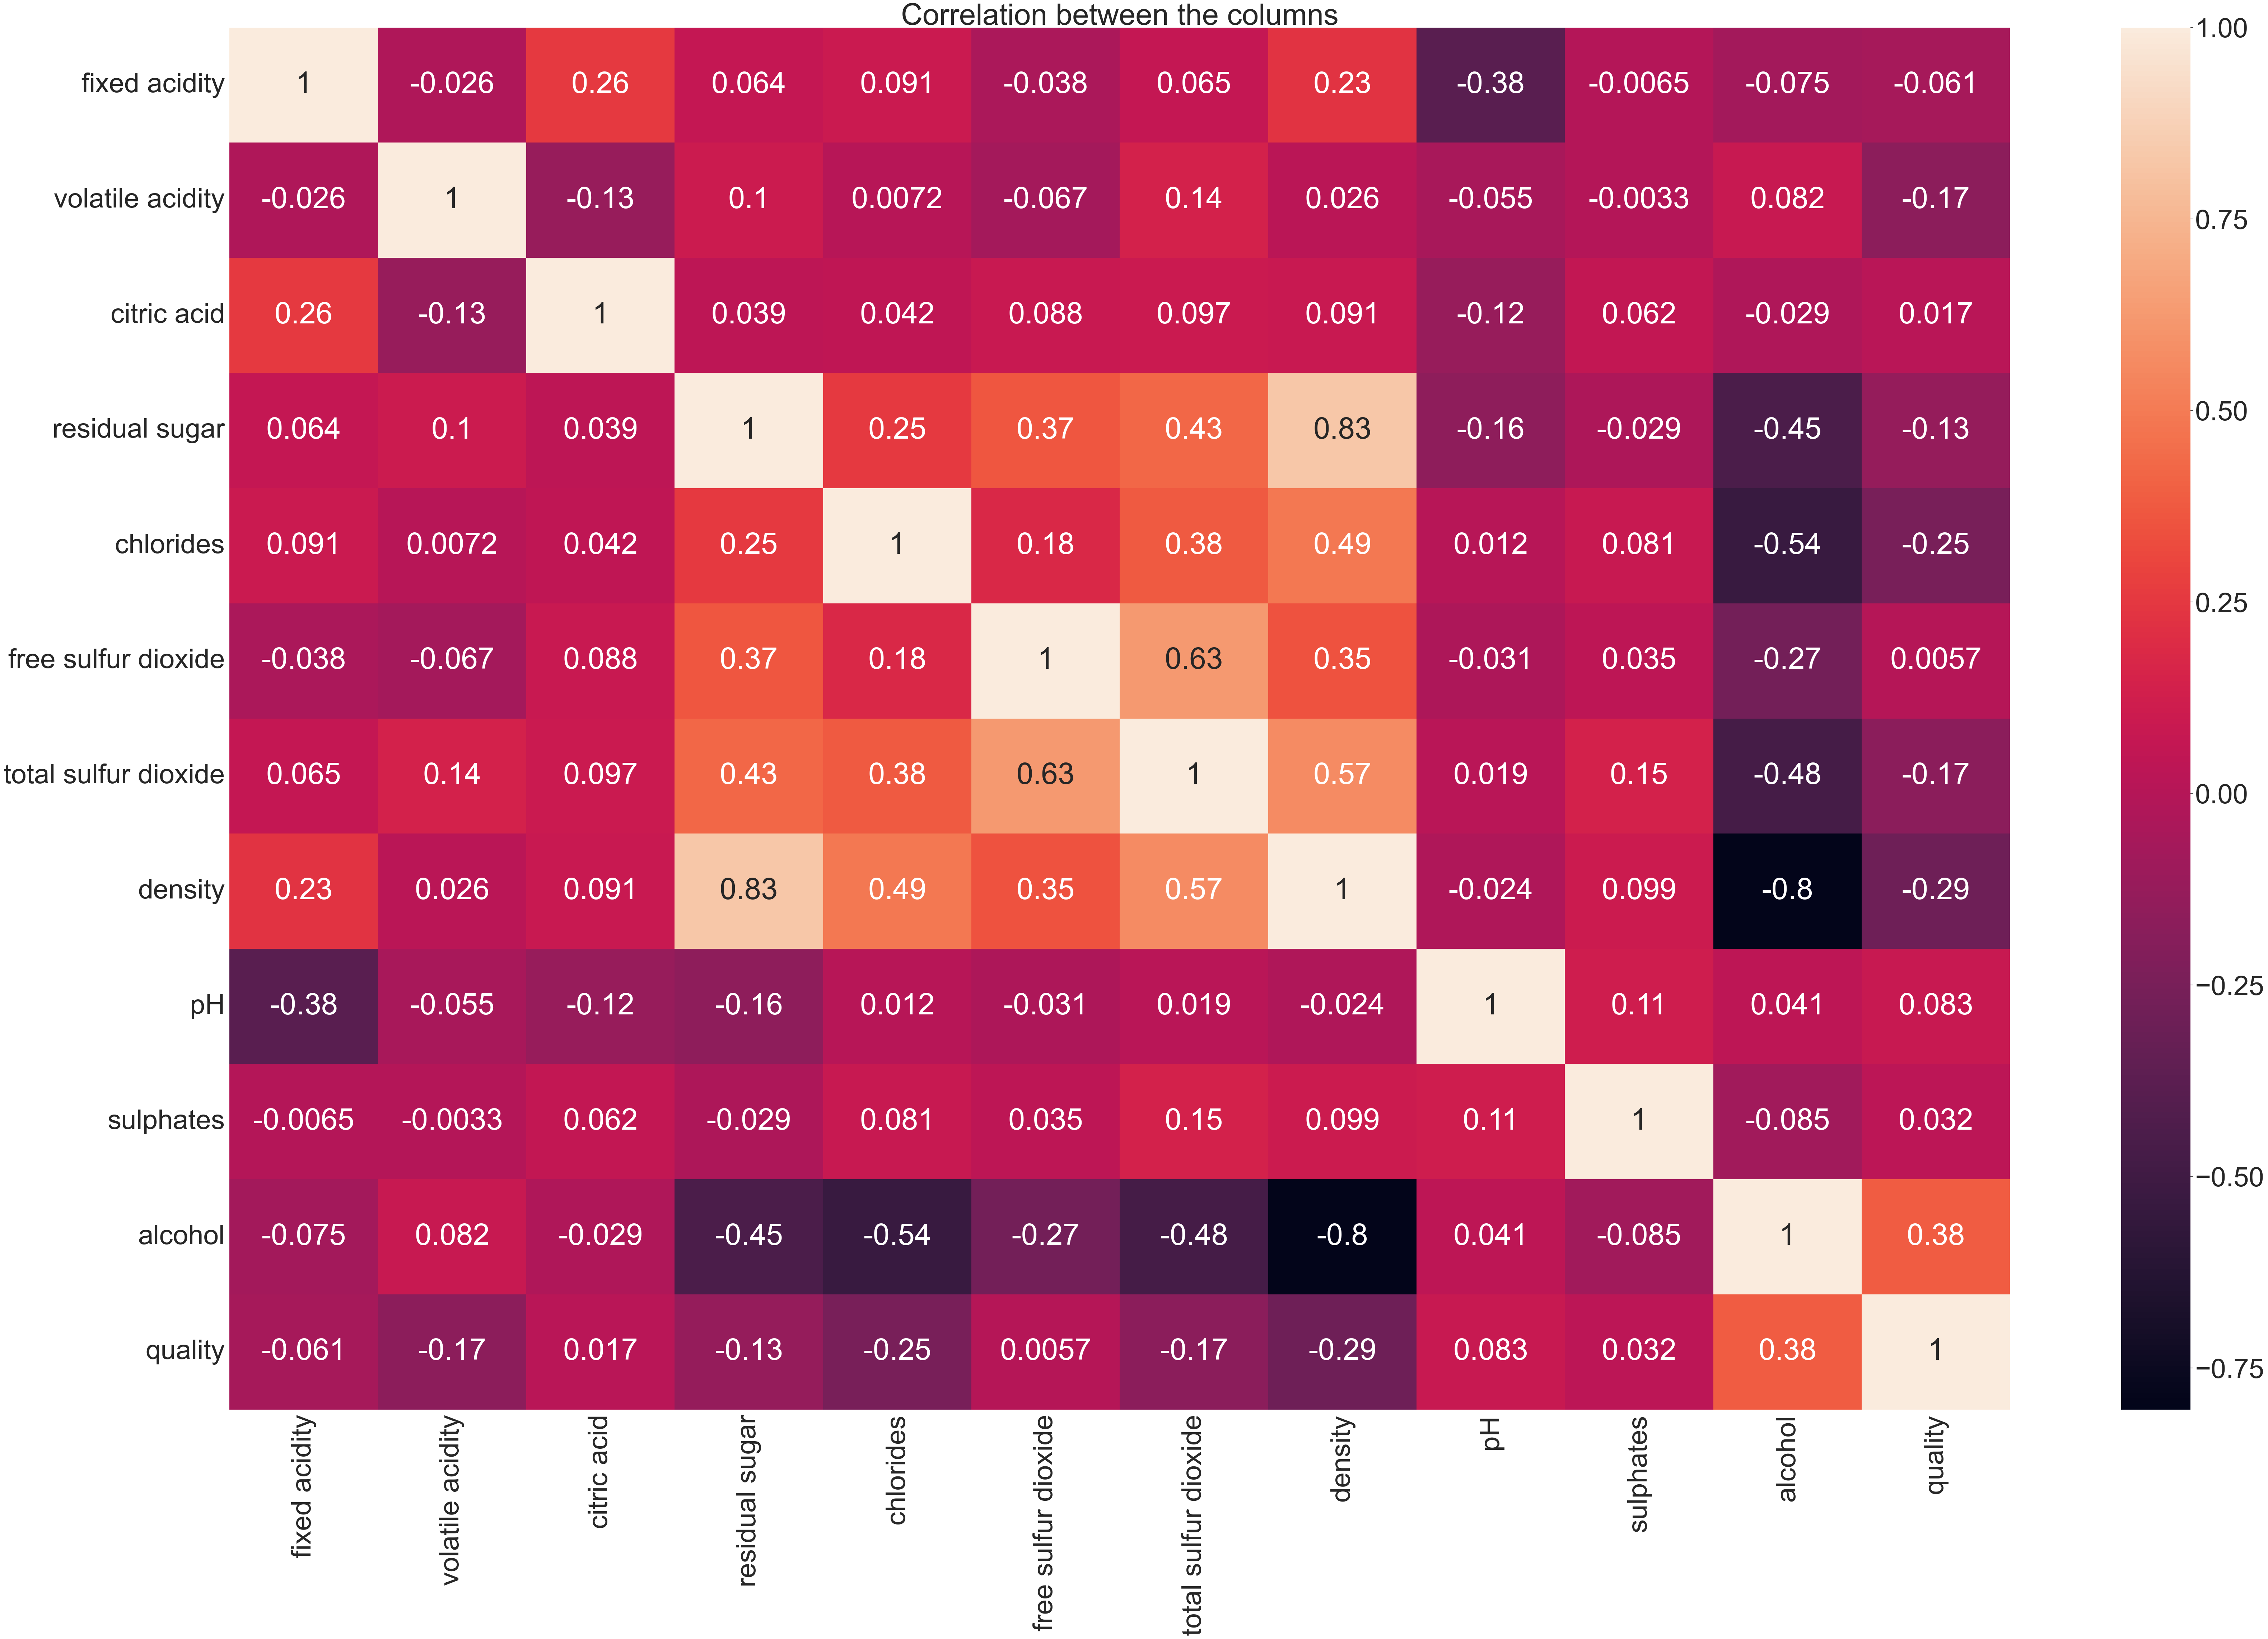

In [29]:
plt.figure(figsize=(80,50))
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation between the columns')
plt.show()

**Define Target Variable (y) and Feature Variables (X)**

In [30]:
Y = wine['quality']
X = wine.drop(['quality'],axis=1)

**Feature Scaling**

In [31]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)

In [32]:
X

array([[-0.66204968,  0.43936358,  0.17341996, ...,  0.7522504 ,
         0.07214776, -0.96140899],
       [ 1.72193829,  0.18319089,  0.86423155, ...,  0.46541271,
        -0.438464  , -0.44941894],
       [ 0.52994431, -0.45724086, -0.05685057, ..., -0.03655325,
        -0.84695342, -0.62008229],
       ...,
       [-0.39716212, -0.32915451, -1.55360901, ..., -1.47074172,
        -0.2342193 , -1.04674067],
       [-1.72159988,  0.31127724, -0.28712109, ...,  1.0390881 ,
        -1.05119812,  1.85453629],
       [-1.059381  , -0.71341355,  0.63396102, ...,  0.46541271,
        -1.66393224,  1.00121954]])

**Train Test Split**

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2529)

In [35]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2191, 11), (940, 11), (2191,), (940,))

**Modeling**

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
model = LogisticRegression(max_iter=200)

In [38]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=200)

In [39]:
model.intercept_

array([1.02692805])

In [40]:
model.coef_

array([[ 0.11314486, -0.47563416, -0.01376988,  0.51324105, -0.13374235,
         0.32149869, -0.08299418, -0.59708414,  0.22514747,  0.22904909,
         0.87605242]])

**Prediction**

In [41]:
Y_pred = model.predict(X_test)

In [42]:
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,

**Model Evaluation**

In [43]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score,precision_score,f1_score

In [44]:
acc_score = accuracy_score(Y_test,Y_pred)
print("Accuracy Score: ",acc_score)

Accuracy Score:  0.75


In [45]:
recall = recall_score(Y_test, Y_pred)
print("Recall:", recall)

Recall: 0.8808446455505279


In [46]:
precision = precision_score(Y_test, Y_pred)
print("Precision:", precision)

Precision: 0.7891891891891892


In [47]:
print(confusion_matrix(Y_test,Y_pred))

[[121 156]
 [ 79 584]]


In [48]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.60      0.44      0.51       277
           1       0.79      0.88      0.83       663

    accuracy                           0.75       940
   macro avg       0.70      0.66      0.67       940
weighted avg       0.73      0.75      0.74       940

